In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
homes = pd.read_csv('data/homes.csv')
homes.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [7]:
homes.info()
homes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [17]:
# Convert 'Sell' column to numeric
homes['Sell'] = pd.to_numeric(homes['Sell'], errors='coerce')

In [30]:
# EDA 1: Correlation matrix
homes.corr()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


I generated a correlation matrix to examine linear relationships among variables.
Strong positive correlations suggest potential predictors of the selling price.
For example, List and Taxes usually show high positive correlation with Sell.

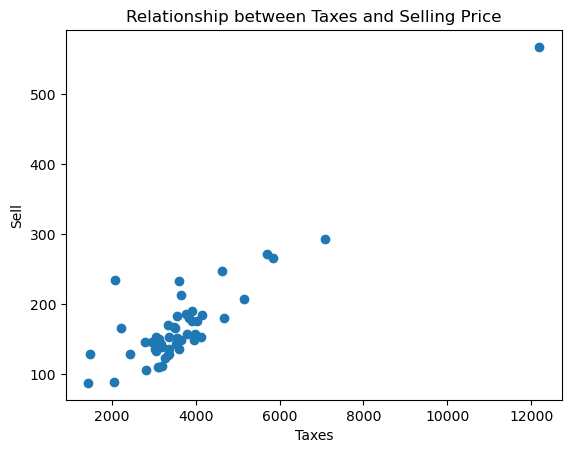

In [32]:
# EDA 2: Scatter plot Sell vs Taxes
plt.scatter(homes['Taxes'], homes['Sell'])
plt.title('Relationship between Taxes and Selling Price')
plt.xlabel('Taxes')
plt.ylabel('Sell')
plt.show()

This scatter plot helps visualize whether higher property taxes are associated with higher selling prices. A clear upward trend would indicate a positive linear relationship.

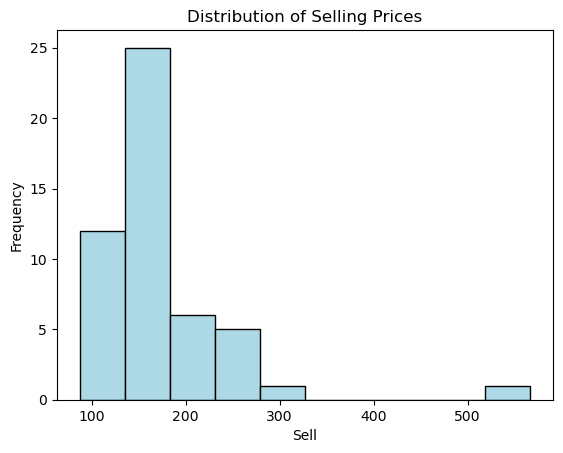

In [34]:
# EDA 3: Histogram of Sell
plt.hist(homes['Sell'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Sell')
plt.ylabel('Frequency')
plt.show()

The histogram shows how house selling prices are distributed.
If the data are right-skewed, most houses sell for moderate amounts while a few sell for much higher prices.
Understanding this helps confirm if the data roughly fit a normal shape for regression.

In [69]:
# Linear regression: Sell ~ Taxes  (Model 1)
# Drop inf/-inf, then drop NaNs only for the variables
data1 = homes[['Sell', 'Taxes']].replace([np.inf, -np.inf], np.nan).dropna()

print("Rows used for model 1:", len(data1))

# OLS: Sell ~ Taxes
y = data1['Sell'].astype(float)
x = data1['Taxes'].astype(float)

x = sm.add_constant(x) 
model1 = sm.OLS(y, x).fit()
print(model1.summary())

Rows used for model 1: 50
                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        09:25:09   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     

Linear regression in statsmodels cannot run if the data contain missing (NaN). Removing them ensures the model uses only complete, valid numeric observations, so the regression results are accurate and error-free.

Model 1: Sell ~ Taxes

R-squared = 0.809, meaning about 81% of the variation in selling price can be explained by property taxes.

The coefficient for Taxes (0.0414) means that for every 1-unit increase in property taxes, the selling price increases by approximately 0.041 (in the same unit as Sell).

The p-value for Taxes = 0.000 (< 0.05), so Taxes is statistically significant.

The intercept (16.87) represents the baseline selling price when Taxes = 0 (not meaningful by itself).

Conclusion: Taxes is a strong and significant predictor of selling price, though it’s likely correlated with property value, higher-value homes naturally pay higher taxes.

In [71]:
# Linear regression: Sell ~ List  (Model 2)

# Clean subset (remove NaN only for these two columns)
data2 = homes[['Sell', 'List']].replace([np.inf, -np.inf], np.nan).dropna()
print("Rows used for model 2 (List):", len(data2))

y2 = data2['Sell'].astype(float)
x2 = data2['List'].astype(float)
x2 = sm.add_constant(x2)

model2 = sm.OLS(y2, x2).fit()
print(model2.summary())

Rows used for model 2 (List): 50
                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9312.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           1.26e-56
Time:                        09:25:12   Log-Likelihood:                -152.97
No. Observations:                  50   AIC:                             309.9
Df Residuals:                      48   BIC:                             313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.32

Model 2: Sell ~ List

R-squared = 0.995, meaning about 99.5% of the variation in selling price can be explained by the listing price.

The coefficient for List = 0.9142 indicates that for every 1-unit increase in the listing price, the selling price increases by about 0.91 units on average.

The p-value = 0.000 (< 0.05) shows that List is a statistically significant predictor of Sell.

The intercept (7.33) represents the estimated selling price when List = 0, but it has little practical meaning.

Conclusion: Listing price is a very strong and reliable predictor of selling price, with an excellent model fit and high explanatory power.

Model Comparison

The first model (Sell ~ Taxes) explained about 81% (R² = 0.809) of the variation in selling price, while the second model (Sell ~ List) explained about 99.5% (R² = 0.995). Both predictors were significant (p < 0.05), but List performed better with a higher R² and smaller residual error.
Overall, Sell ~ List is the stronger model since listing price directly reflects market value, whereas taxes only indirectly relate to property price.

Model Limitations

These are simple one-variable models; real selling prices depend on multiple factors like home size, age, and location.
The regressions assume a linear relationship and constant error variance, which may not always hold. Moreover, correlation doesn’t imply causation—higher listing prices don’t cause higher selling prices; both reflect underlying property value.